In [61]:
import yfinance as yf
import pandas as pd
import warnings
import statsmodels.api as sm
import numpy as np
#Generacion de funcion de autocorrelacion
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
warnings.filterwarnings('ignore')

#Generacion de funcion de autocorrelacion
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [63]:
dis = yf.download(tickers= 'DIS', start = '2023-01-01', end ='2023-03-31', rounding = True)
dis

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DIS,DIS,DIS,DIS,DIS
Date,,,,,
2023-01-03,86.92,87.90,85.81,86.93,14997100
2023-01-04,89.86,90.62,87.30,87.93,14957200
2023-01-05,89.81,90.35,88.43,89.55,11622600
2023-01-06,91.76,92.51,89.22,90.53,9828100
2023-01-09,92.59,93.50,91.30,92.26,11675800
...,...,...,...,...,...
2023-03-24,91.92,92.81,90.88,92.63,9534600
2023-03-27,93.42,93.81,92.21,92.60,7487900


In [65]:
dis = dis['Close']
dis

Ticker,DIS
Date,
2023-01-03,86.92
2023-01-04,89.86
2023-01-05,89.81
2023-01-06,91.76
2023-01-09,92.59
...,...
2023-03-24,91.92
2023-03-27,93.42
2023-03-28,92.64


In [67]:
dis.index = pd.to_datetime(dis.index)
len_train = int(len(dis)*0.7)
len_train

42

In [69]:
#Definir grupos de prueba y entrenamiento.
train = dis[0:42]
train

Ticker,DIS
Date,
2023-01-03,86.92
2023-01-04,89.86
2023-01-05,89.81
2023-01-06,91.76
2023-01-09,92.59
2023-01-10,93.36
2023-01-11,94.11
2023-01-12,97.51
2023-01-13,97.11


In [71]:
test = dis[42:]
test

Ticker,DIS
Date,
2023-03-06,98.34
2023-03-07,96.78
2023-03-08,97.02
2023-03-09,93.93
2023-03-10,91.42
2023-03-13,90.47
2023-03-14,91.21
2023-03-15,90.96
2023-03-16,92.12


[ 1.00000000e+00  8.93326010e-01  8.00398906e-01  7.00559734e-01
  6.16627180e-01  5.20383171e-01  4.09496621e-01  2.95659682e-01
  2.14366145e-01  1.15862438e-01 -1.88996268e-04 -1.11438987e-01
 -2.24142471e-01 -3.01156856e-01 -3.59873509e-01 -4.17884216e-01
 -4.41392956e-01]


<function matplotlib.pyplot.show(close=None, block=None)>

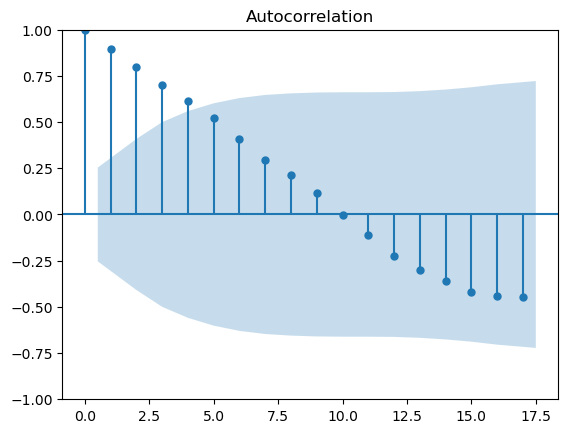

In [73]:
acf_array = acf(train)
print(acf_array)
#Gráfico con el nivel de confianza del 90%
plot_acf(train, alpha=0.1)
plt.show

In [75]:
from statsmodels.tsa.arima.model import ARIMA
#fit an AR(1) to the first simulated data
mod = ARIMA(train, order=(1,0,0))
res = mod.fit()

In [77]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    DIS   No. Observations:                   42
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -84.085
Date:                Wed, 17 Dec 2025   AIC                            174.170
Time:                        06:13:21   BIC                            179.383
Sample:                             0   HQIC                           176.081
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.9023      5.142     18.650      0.000      85.824     105.981
ar.L1          0.9715      0.032     30.158      0.000       0.908       1.035
sigma2         2.9971      0.666      4.502      0.0

In [79]:
predicciones = res.forecast(len(test))
predicciones

42    98.726996
43    98.646361
44    98.568028
45    98.491931
46    98.418006
47    98.346192
48    98.276428
49    98.208655
50    98.142817
51    98.078858
52    98.016725
53    97.956365
54    97.897729
55    97.840766
56    97.785430
57    97.731673
58    97.679451
59    97.628719
60    97.579436
Name: predicted_mean, dtype: float64

In [81]:
conf = res.get_forecast(len(test)).conf_int(alpha= 0.1)
conf

,lower DIS,upper DIS
42,95.879397,101.574595
43,94.676311,102.616411
44,93.773957,103.362099
45,93.033130,103.950732
46,92.398841,104.437172
47,91.842329,104.850055
48,91.346167,105.206688
49,90.898770,105.518540
50,90.491928,105.793705
51,90.119544,106.038171


In [129]:
fcast_res = res.get_forecast(len(test))
print(fcast_res.summary_frame(alpha = 0.1))

DIS       mean   mean_se  mean_ci_lower  mean_ci_upper
42   98.758393  1.578248      96.162407     101.354379
43   98.403938  2.238645      94.721695     102.086182
44   98.218530  2.756575      93.684367     102.752693
45   98.831857  3.156398      93.640045     104.023669
46   99.366680  3.658685      93.348679     105.384681
47   99.275609  4.253664      92.278954     106.272264
48   99.119229  4.742445      91.318601     106.919857
49   99.170056  5.142340      90.711660     107.628451
50   99.405015  5.492669      90.370378     108.439651
51   99.472537  5.836042      89.873101     109.071972
52   99.363366  6.144819      89.256039     109.470693
53   99.275689  6.394390      88.757854     109.793524
54   99.280332  6.595236      88.432135     110.128529
55   99.294778  6.763722      88.169445     110.420111
56   99.227659  6.906209      87.867956     110.587362
57   99.120953  7.018411      87.576694     110.665212
58   99.041231  7.101633      87.360083     110.722378
59   98.99

In [131]:
test = pd.DataFrame(test)
predicciones = pd.DataFrame(predicciones)
test= test.reset_index()
predicciones = predicciones.reset_index()


In [133]:
predicciones

,index,predicted_mean
0,0,98.726996
1,1,98.646361
2,2,98.568028
3,3,98.491931
4,4,98.418006
5,5,98.346192
6,6,98.276428
7,7,98.208655
8,8,98.142817
9,9,98.078858


In [135]:
acumulador1= 0
acumulador2 = 0
for contador in range(0,19):
    acumulador1 = acumulador1 + (test.iloc[contador][1] - predicciones.iloc[contador][1])**2
    acumulador2 = acumulador2  + np.abs((test.iloc[contador][1]- predicciones.iloc[contador][1]))/ test.iloc[contador][1]

mse = acumulador1 /101
rmse = np.round(np.sqrt(mse),2)
mape = np.round((acumulador2/101)*100,2)
print ("RMSE =", rmse, "MAPE = ", mape, "%")

RMSE = 2.25 MAPE =  0.96 %


In [137]:
#Pronóstico de los siguientes 5 periodos posteriores al último dato histórico
predicciones = res.forecast(len(test) + 5)
predicciones.tail(5)

61    98.837961
62    98.748344
63    98.676014
64    98.612771
65    98.545069
Name: predicted_mean, dtype: float64

In [139]:
conf = res.get_forecast(len(test)+5).conf_int(alpha = 0.1)
conf.tail(5)

,lower DIS,upper DIS
61,86.930840,110.745082
62,86.808360,110.688327
63,86.717132,110.634896
64,86.644038,110.581504
65,86.572040,110.518099


In [141]:
train = pd.DataFrame(train)
lista = test["Date"]
lista = pd.DataFrame(lista)
test.index = test["Date"]
test.drop(columns=["Date"],inplace = True)
test

Ticker,DIS
Date,
2023-03-06,98.34
2023-03-07,96.78
2023-03-08,97.02
2023-03-09,93.93
2023-03-10,91.42
2023-03-13,90.47
2023-03-14,91.21
2023-03-15,90.96
2023-03-16,92.12


In [143]:
lista

,Date
0,2023-03-06
1,2023-03-07
2,2023-03-08
3,2023-03-09
4,2023-03-10
5,2023-03-13
6,2023-03-14
7,2023-03-15
8,2023-03-16
9,2023-03-17


In [145]:
k =5
lista2= []
for day in range(1,6):
    fecha = ((pd.to_datetime("2023-04-05")+ pd.offsets.BDay(day)).date())
    lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns = ["Date"])
lista2["Date"] = pd.to_datetime(lista2["Date"])
lista2

,Date
0,2023-04-06
1,2023-04-07
2,2023-04-10
3,2023-04-11
4,2023-04-12


In [147]:
fechas = pd.concat([lista, lista2], ignore_index=True)
fechas

,Date
0,2023-03-06
1,2023-03-07
2,2023-03-08
3,2023-03-09
4,2023-03-10
5,2023-03-13
6,2023-03-14
7,2023-03-15
8,2023-03-16
9,2023-03-17


In [149]:
predicciones = pd.DataFrame(predicciones)

predicciones

,predicted_mean
42,98.758393
43,98.403938
44,98.218530
45,98.831857
46,99.366680
47,99.275609
48,99.119229
49,99.170056
50,99.405015
51,99.472537


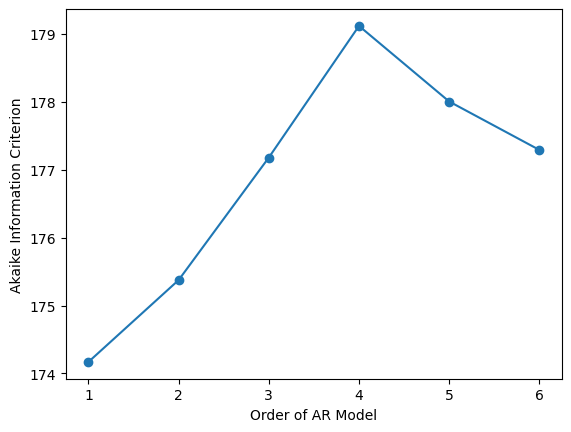

In [161]:
#Determinacion del valor adecuado de p para AR(p) a partir del criterio de informacion Akaine
AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train,order=(p,0,0))
    res = mod.fit()
    AIC[p] = res.aic

plt.plot(range(1,7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

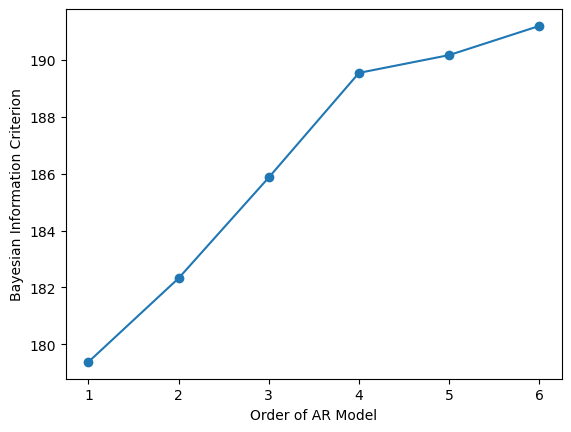

In [163]:
#Determinacion del valor adecuado de p para AR(p) a partir del criterio de informacion bayesiano
AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train,order=(p,0,0))
    res = mod.fit()
    AIC[p] = res.bic

plt.plot(range(1,7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()